# Taller 2 - Saber Pro
### David Santiago Pinchao Ortiz

Prepare el conjunto de datos elimine los valores incompletos para este conjunto de
datos y transforme las variables categóricas a dummies.


In [3]:
import pandas as pd

data=pd.read_csv('./Saber_pro.csv', sep=';')  
data.head()

#data.dtypes

nota genero  estu_edad_examen estado_civil  \
0   BAJO LA MEDIA      M              24.0   SOLTERO(A)   
1  SOBRE LA MEDIA      F              23.0   SOLTERO(A)   
2   BAJO LA MEDIA      M              30.0   SOLTERO(A)   
3   BAJO LA MEDIA      F              20.0   SOLTERO(A)   
4   BAJO LA MEDIA      M              34.0   SOLTERO(A)   

                                 estu_hogar_actual estu_sn_cabeza_fmlia  \
0                      ES EL HABITUAL - PERMANENTE                   NO   
1                      ES EL HABITUAL - PERMANENTE                   NO   
2                      ES EL HABITUAL - PERMANENTE                   SI   
3  ES TEMPORAL POR RAZONES DE ESTUDIO U OTRA RAZON                   NO   
4  ES TEMPORAL POR RAZONES DE ESTUDIO U OTRA RAZON                   NO   

  estu_pers_cargo                     fami_nivel_educa_padres  \
0              NO          SECUNDARIA (BACHILLERATO) COMPLETA   
1              NO  EDUCACION TECNICA O TECNOLOGICA CON TITULO   
2              SI                           PRIMARIA COMPLETA   
3              NO                           PRIMARIA COMPLETA   
4              SI                           PRIMARIA COMPLETA   

                                     fami_ocup_padre  \
0                         OTRA ACTIVIDAD U OCUPACION   
1  PROFESIONAL INDEPENDIENTE EJERCE SU PROFESION ...   
2  PENSIONADO(A) PERSONA QUE VIVE DE UNA PENSION ...   
3  PENSIONADO(A) PERSONA QUE VIVE DE UNA PENSION ...   
4  TRABAJADOR POR CUENTA PROPIA EJERCE UN OFICIO ...   

                                     fami_ocup_madre  ...  \
0  HOGAR PERSONAS DEDICADAS PRINCIPALMENTE A LAS ...  ...   
1  TRABAJADOR POR CUENTA PROPIA EJERCE UN OFICIO ...  ...   
2  HOGAR PERSONAS DEDICADAS PRINCIPALMENTE A LAS ...  ...   
3  HOGAR PERSONAS DEDICADAS PRINCIPALMENTE A LAS ...  ...   
4  TRABAJADOR POR CUENTA PROPIA EJERCE UN OFICIO ...  ...   

                   fami_nivel_sisben econ_condicion_vivienda  \
0  NO ESTA CLASIFICADO POR EL SISBEN                   BUENA   
1  NO ESTA CLASIFICADO POR EL SISBEN                   BUENA   
2                     SISBEN NIVEL 3                   BUENA   
3                     SISBEN NIVEL 2                   BUENA   
4                     SISBEN NIVEL 1                   BUENA   

          eco_condicion_hogar         eco_condicion_transporte  \
0    CONDICION VIVIENDA BUENA  CONDICION TRANSPORTE PARTICULAR   
1    CONDICION VIVIENDA BUENA  CONDICION TRANSPORTE PARTICULAR   
2  CONDICION VIVIENDA REGULAR  CONDICION TRANSPORTE PARTICULAR   
3    CONDICION VIVIENDA BUENA     CONDICION TRANSPORTE PUBLICO   
4     CONDICION VIVIENDA MALA     CONDICION TRANSPORTE PUBLICO   

       eco_condicion_tic eco_condicion_vive fami_ing_fmliar_mensual  \
0  CONDICION HOGAR BUENA   SIN HACINAMIENTO           TRES SALARIOS   
1  CONDICION HOGAR BUENA   SIN HACINAMIENTO           TRES SALARIOS   
2  CONDICION HOGAR BUENA   SIN HACINAMIENTO           SEIS SALARIOS   
3  CONDICION HOGAR BUENA   SIN HACINAMIENTO            DOS SALARIOS   
4  CONDICION HOGAR BUENA   SIN HACINAMIENTO            DOS SALARIOS   

                                        estu_trabaja num_estu_zona  \
0                                                 NO         13733   
1                                                 NO         16500   
2  SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O L...         33544   
3                                                 NO         13519   
4  SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PAR...         13345   

  num_instituciones_zona  
0                     64  
1                     78  
2                     73  
3                     56  
4                     64  

[5 rows x 32 columns]

In [6]:
#Datos nulos se eliminan
data=data.dropna(axis=0) 
#display(data.isnull().sum())

#Variables Categoricas a Dummies
df_dummies=pd.get_dummies(data)


**1.1.1**
 Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente.


In [7]:
#Separamos variables a analizar y el resto de variables del DF

def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)


Y=data['nota']
X=data.drop(labels=['nota'],axis=1)
X=function_dummies(X)

Y = Y.str.replace('BAJO LA MEDIA','0')
Y = Y.replace('SOBRE LA MEDIA','1')

print(Y.count())
display(X.head(5))
#Y.head()
#print(Y[Y=='0'].count())

77419


estu_edad_examen  num_estu_zona  num_instituciones_zona  genero_F  \
0              24.0          13733                      64         0   
1              23.0          16500                      78         1   
2              30.0          33544                      73         0   
3              20.0          13519                      56         1   
4              34.0          13345                      64         0   

   genero_M  estado_civil_CASADO(A)  estado_civil_SEPARADO(A) Y/O DIVORCIADO  \
0         1                       0                                        0   
1         0                       0                                        0   
2         1                       0                                        0   
3         0                       0                                        0   
4         1                       0                                        0   

   estado_civil_SOLTERO(A)  estado_civil_UNION LIBRE  estado_civil_VIUDO(A)  \
0                        1                         0                      0   
1                        1                         0                      0   
2                        1                         0                      0   
3                        1                         0                      0   
4                        1                         0                      0   

   ...  fami_ing_fmliar_mensual_CUATRO SALARIOS  \
0  ...                                        0   
1  ...                                        0   
2  ...                                        0   
3  ...                                        0   
4  ...                                        0   

   fami_ing_fmliar_mensual_DOS SALARIOS  \
0                                     0   
1                                     0   
2                                     0   
3                                     1   
4                                     1   

   fami_ing_fmliar_mensual_SEIS SALARIOS  \
0                                      0   
1                                      0   
2                                      1   
3                                      0   
4                                      0   

   fami_ing_fmliar_mensual_SIETE SALARIOS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   fami_ing_fmliar_mensual_TRES SALARIOS  fami_ing_fmliar_mensual_UN SALARIO  \
0                                      1                                   0   
1                                      1                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   estu_trabaja_NO  \
0                1   
1                1   
2                0   
3                1   
4                0   

   estu_trabaja_SI, PARA ADQUIRIR EXPERIENCIA Y/O RECURSOS PARA SUS GASTOS PERSONALES  \
0                                                  0                                    
1                                                  0                                    
2                                                  0                                    
3                                                  0                                    
4                                                  1                                    

   estu_trabaja_SI, PARA CONTRIBUIR A PAGAR SU MATRICULA Y/O LOS GASTOS DEL HOGAR  \
0                                                  0                                
1                                                  0                                
2                                                  1                                
3                      

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.3,
                                               random_state=8)


print("SOBRE LA MEDIA (train):",Y_train[Y_train=='1'].count())
print("BAJO LA MEDIA (train):",Y_train[Y_train=='0'].count())

print("SOBRE LA MEDIA (test):",Y_test[Y_test=='1'].count())
print("BAJO LA MEDIA (test):",Y_test[Y_test=='0'].count())

#Semilla Valor 8 mejor accuracy
#print(len(X_test.columns))

SOBRE LA MEDIA (train): 27053
BAJO LA MEDIA (train): 27140
SOBRE LA MEDIA (test): 11422
BAJO LA MEDIA (test): 11804


**1.1.2**
 Ajuste el mejor modelo posible explotando los parámetros del árbol .

In [10]:
from sklearn import tree
modelo=tree.DecisionTreeClassifier(max_depth=5,criterion='entropy',class_weight='balanced', splitter='random')

modelo.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

**1.1.3**
 Visualizar el árbol generado y explicar dos reglas de este que mas le llamen la
atención.


In [423]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

# Arból de Decision

- La primera regla que llama mi atencion es la primera, en la cual dependiendo el area del conocimiento del estudiante toma la decision de seguir evaluando al ver si una institucion es acreditada o no, lo cual en siguientes niveles repercute su evaluacion para ver sobre que areas tomar decisiones. Pero a pesar de esto se tiene un valor muy elevado de entropia.

- La segunda regla interesante se ubica en los ultimos niveles donde el arbol determina los resultados dependiendo de las condiciones de vida que tiene el estudiante o de los estratos a que pertenece, junto con esto se identifica variables como los ingresos familiares o si tiene SISBEN. Ademas en otras ramas hay reglas relacionadas a la ocupacion del padre o la zona donde vive.

**1.1.4**
 Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de
validación.


In [424]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report

#predict test
Y_pred_test=modelo.predict(X_test)
#predict train
Y_pred_train=modelo.predict(X_train)

display('Test Matriz Confusion:',confusion_matrix(Y_test,Y_pred_test))

tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred_test).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

'Test Matriz Confusion:'

array([[8233, 3571],
       [4386, 7036]])

verdaderos positivos: 7036
verdaderos negativos: 8233
falsos positivos: 3571
falsos negativos: 4386


**1.1.4**
 Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de
validación.


In [425]:
ac=(tp+tn)/(tp+tn+fp+fn)
print("performance test:", ac)
print("accuracy test:",accuracy_score(Y_test, Y_pred_test))
print("accuracy train:",accuracy_score(Y_train, Y_pred_train))

performance test: 0.6574097993627831
accuracy test: 0.6574097993627831
accuracy train: 0.6545863856955695


**1.1.6**
Calcular el AUC y el gráfico ROC en entrenamiento y validación.


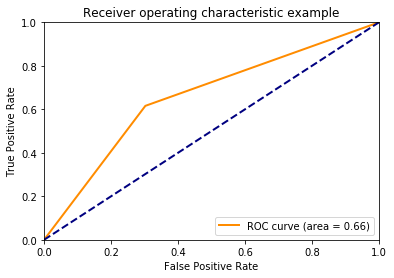

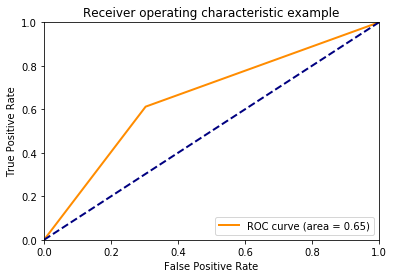

0.6545186948592218

In [426]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def my_roc(y_real,y_pred): 
    y_real = label_binarize(y_real, classes=['0', '1'])
    y_pred = label_binarize(y_pred, classes=['0', '1'])
    fpr, tpr, _ = roc_curve(y_real.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return (roc_auc)

my_roc(Y_test, Y_pred_test)
my_roc(Y_train, Y_pred_train)

# Mejor Modelo CV

In [420]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer

param={'criterion':['entropy','gini'],
       'splitter':['random','best'],
       'max_depth':[5,10,20],
       'min_samples_split':[100,500,3000],
       #'min_samples_leaf':[100,300,1000],
      # 'min_weight_fraction_leaf':[0,1],
       #'max_features':[None,'auto','sqrt','log2'],
       #'random_state':[0,1,2],
       #'max_leaf_nodes':[100,500,1000],
       #'min_impurity_decrease':[0,0.4],
       #'min_impurity_split':[0,0.4],
       'class_weight':['balanced',None]
      }

modelo = tree.DecisionTreeClassifier()
auc_scorer = make_scorer(auc)

grid = GridSearchCV(modelo, param, cv=4,n_jobs=-1,scoring=auc_scorer)
Y_bin_train = label_binarize(Y_train, classes=[0, 1])


grid_ejec = grid.fit(X_train, Y_bin_train.ravel())

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')


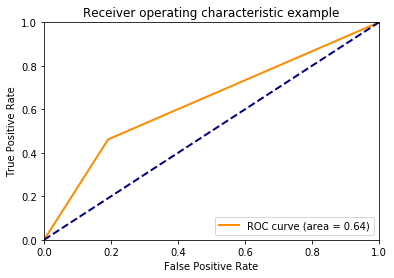

0.6352684816812705

In [427]:
mejor_modelo = grid_ejec.best_estimator_
print(mejor_modelo)

mejor_modelo=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
mejor_modelo.fit(X_train,Y_train)

my_roc(Y_test, mejor_modelo.predict(X_test))

**1.1.7**
Utilizar el conjunto de entrenamiento calcule el promedio de AUC y accuracy con el
método de validación cruzada con 10 folds o particiones.


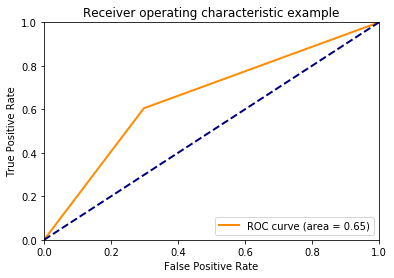

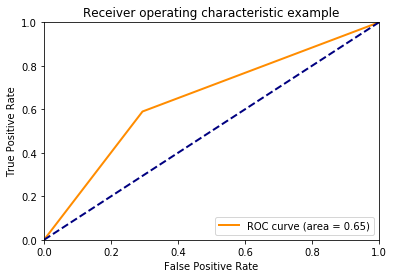

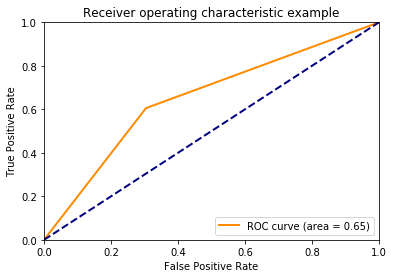

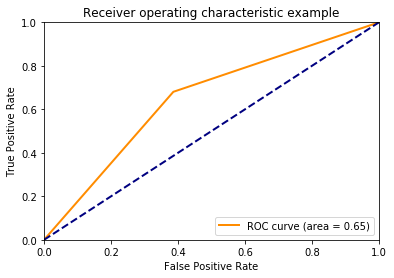

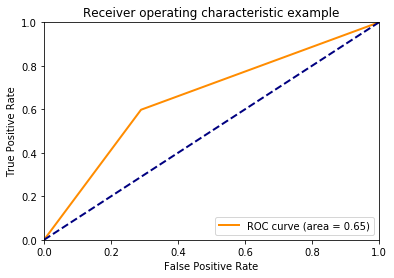

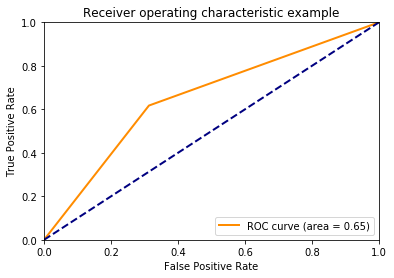

Promedio AUC:  0.649908604147637
Promedio Accuracy:  0.6511357730894777


In [428]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=False)

aucs = []
accuracy = []
for train,test in cv.split(X_train,Y_train):
    m=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')
    m.fit(X_train.iloc[train],Y_train.iloc[train])
    
    accuracy.append(accuracy_score(Y_train.iloc[train],m.predict(X_train.iloc[train])))
    
    aucs.append(my_roc(Y_train.iloc[test],
                m.predict(X_train.iloc[test])       
                ))
                    
print('Promedio AUC: ',sum(aucs)/len(aucs))  
print('Promedio Accuracy: ',sum(accuracy)/len(accuracy))  
                    


**1.1.8**
 Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la
siguiente lógica. Entregue los resultados indicados:
- Al azar e indique la cantidad de individuos que están por encima de la media.


In [433]:
X_test_train_75, X_test_25, Y_test_train_75, Y_test_25 = train_test_split(X_test, Y_test, 
                                                                            test_size = 0.25,
                                                                            random_state = 0)

#cantidad de individuos SOBRE LA MEDIA AL AZAR

print("Total 25%", Y_test_25.count())
print("SOBRE LA MEDIA (AZAR): ", Y_test_25[Y_test_25=='1'].count())


Total 25% 5807
SOBRE LA MEDIA (AZAR):  2818


- Utilizando el modelo desarrollado en el punto 1.1.2 e indique la cantidad de
individuos que están por encima de la media.

In [434]:
#modelo
#predict test
#Y_pred_test=modelo.predict(X_test)

#Y_pred_test_25=modelo.predict(X_test_25)

print(len(X_test.columns))

probs_test = modelo.predict_proba(X_test)
data_set_test = X_test.copy()



data_set_test['predicho']= Y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['real']=Y_test

data_set_test['predicho_prob_1'].head(5)
#display(data_set_test.head())


#Y_pred_test=modelo.predict(X_test_25)
#print("SOBRE LA MEDIA (MODELO): ", len(Y_pred_test[Y_pred_test=='1']))


239


61140    0.422065
19399    0.237231
6049     0.749777
36592    0.512841
10882    0.384295
Name: predicho_prob_1, dtype: float64

In [435]:
Y_25_model=data_set_test.sort_values(['predicho_prob_1'],
                             ascending=[False])[1:Y_test_25.count()]

print("ENCIMA DE LA MEIDA (modelo):", len(Y_25_model[Y_25_model['real']=='1']))


ENCIMA DE LA MEIDA (modelo): 4366



**1.1.9**
 Lea el conjunto de datos Saber_pro_predecir.csv utilice el modelo generado para
predecir los registros de este archivo, genere archivo.csv con los resultados de las
predicciones de su modelo y enviarlo por vía mail.



In [25]:
import numpy as np
df_predecir=pd.read_csv('./Saber_pro_predecir.csv', sep=';')  

#display(df_predecir.isnull().sum())
#display(df_predecir.describe())


df_predecir["estu_edad_examen"]=df_predecir["estu_edad_examen"].replace(np.nan, 
                                df_predecir["estu_edad_examen"].mean())
df_predecir["estu_pers_cargo"]=df_predecir["estu_pers_cargo"].replace(np.nan, df_predecir["estu_pers_cargo"].mode())

df_predecir["estu_pers_cargo"].fillna(value=
                                      df_predecir["estu_pers_cargo"].mode()[0],
                                      inplace =True)
df_predecir["estu_pje_creditos"].fillna(value=df_predecir["estu_pje_creditos"].mode()[0],inplace =True)
df_predecir["eco_condicion_vive"].fillna(value=df_predecir["eco_condicion_vive"].mode()[0],inplace =True)
display(df_predecir.isnull().sum())
df_predecir=function_dummies(df_predecir)

#df_predecir["estu_pers_cargo"].unique()
#df_predecir["estu_pers_cargo"].mode()[0]

#display(df_predecir.isnull().sum())
#display(df_predecir.head(3))


genero                         0
estu_edad_examen               0
estado_civil                   0
estu_hogar_actual              0
estu_sn_cabeza_fmlia           0
estu_pers_cargo                0
fami_nivel_educa_padres        0
fami_ocup_padre                0
fami_ocup_madre                0
inst_tipo                      0
inst_caracter_academico        0
inst_acreditada                0
prog_acreditado                0
inst_programa_zona             0
estu_metodo_prgm               0
estu_area_conoc                0
area_grupo_referencia          0
estu_pje_creditos              0
estu_titulo_bto                0
estu_financiacion_matricula    0
estu_estrato                   0
fami_nivel_sisben              0
econ_condicion_vivienda        0
eco_condicion_hogar            0
eco_condicion_transporte       0
eco_condicion_tic              0
eco_condicion_vive             0
fami_ing_fmliar_mensual        0
estu_trabaja                   0
num_estu_zona                  0
num_instit

In [29]:
df_dummies=pd.get_dummies(df_predecir)

#print(len(df_predecir.columns))
#print(len(X_train.columns))

#for i in range(len(X_train.columns)):
#    if X_train.columns[i] not in df_predecir.columns:
#        df_dummies[X_train.columns[i]] = 0
      
i=0
while i<len(X_train.columns):
    if X_train.columns[i] not in df_predecir.columns:
        df_dummies[X_train.columns[i]] = 0
    i += 1


In [28]:
print(len(df_predecir))
print(len(df_dummies))

19413
19413


**Entranar el Modelo con el nuevo Dataset**

In [30]:
Y_modelo = modelo.predict(df_dummies[X_train.columns])
Y_modelo



array(['1', '0', '0', ..., '0', '0', '1'], dtype=object)

**Exportar resultados predichos a un nuevo dataset**

In [31]:
df_final = pd.DataFrame() 
df_final['Y'] = Y_modelo
df_final.to_csv('predicted_dataset.csv')
